In [40]:
# detect incompletely collected articles

def select(crs, db, cls, cnds, tb="articles"): # columns list
    
    query = "SELECT " + ", ".join(c for c in cls) + " FROM " + tb + " WHERE " + " AND ".join(c for c in cnds)
    print(query)
    crs.execute(query)
    
    result = crs.fetchall()
    articles = {}
    
    for r in result:
        articles[r[0]] = [r[i] for i in range(1, len(cls))]
    
    return articles

In [43]:
articles = select(mycursor, mydb, ["article_id", "title", "content", "metadata"], ["is_privacy = 'privacy'"])

SELECT article_id, title, content, metadata FROM articles WHERE is_privacy = 'privacy'


In [49]:
import json

In [ ]:
for a in articles.keys():
    if json.loads()

In [55]:
processed_articles = {}

for a in articles.keys():
    processed_articles[a] = {
        "title": articles[a][0],
        "content": articles[a][1],
        "wordCount": json.loads(articles[a][2])["wordCount"]
    }

In [137]:
tbr = []
# > 200 words apart between wordcount and len content + title.split()
with open("./to_be_recollected.csv", "r") as f:
        reader = csv.reader(f)
        for r in reader:
            tbr.append(r[0])

In [140]:
# import pandas as pd

# df = pd.DataFrame(to_be_recollected)
# df.to_csv("to_be_recollected.csv", index=False, header=False)

In [141]:
sorted(tbr)

['AFR_1015',
 'AFR_1352',
 'AFR_1470',
 'AFR_1631',
 'AFR_2191',
 'AFR_2402',
 'AFR_2471',
 'AFR_2555',
 'AFR_711',
 'AFR_791',
 'DT_4458',
 'GM_2580',
 'GM_2807',
 'GM_4107',
 'GM_4171',
 'GM_4630',
 'GM_4871',
 'GM_4927',
 'GM_5343',
 'GM_5381',
 'NYT_1015',
 'NYT_1030',
 'NYT_1072',
 'NYT_1117',
 'NYT_1270',
 'NYT_1349',
 'NYT_1351',
 'NYT_1356',
 'NYT_1448',
 'NYT_1490',
 'NYT_1533',
 'NYT_1658',
 'NYT_1660',
 'NYT_1698',
 'NYT_1927',
 'NYT_2327',
 'NYT_3119',
 'NYT_3145',
 'NYT_3296',
 'NYT_3365',
 'NYT_3392',
 'NYT_3399',
 'NYT_3492',
 'NYT_3621',
 'NYT_3721',
 'NYT_3858',
 'NYT_3911',
 'NYT_3996',
 'NYT_4095',
 'NYT_540',
 'NYT_550',
 'NYT_565',
 'NYT_631',
 'NYT_636',
 'NYT_658',
 'NYT_764',
 'NYT_783',
 'NYT_835',
 'NYT_873',
 'NYT_885',
 'NYT_902',
 'NYT_921',
 'NZH_1507',
 'NZH_3494',
 'NZH_5649',
 'NZH_5831',
 'NZH_5880',
 'NZH_5896',
 'NZH_5906',
 'NZH_6049',
 'NZH_6108',
 'NZH_6449',
 'NZH_6469',
 'NZH_6475',
 'NZH_6498',
 'NZH_6507',
 'NZH_6513',
 'NZH_6515',
 'NZH_6525'

In [1]:
# modules
import csv
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [30]:
# initialize variables
import pandas as pd
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv(override=True)

# mysql credentials
PASSWORD = os.getenv("PASSWORD")
USER = os.getenv("USER")


load_dotenv(override=True)


True

In [31]:
# connect to db
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user=USER,
  password=PASSWORD,
  database="mpp21"
)

mycursor = mydb.cursor()

In [4]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def process_article(txt):
    
    txt1 = " ".join(s for s in txt.split("."))
    txt2 = " ".join(s for s in txt.split("-"))
    
    tokens = word_tokenize(txt2)

    tokens = [w.lower() for w in tokens]

    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    article = " ".join([w for w in words if not w in stop_words]) # and reassemble article

    return article

In [5]:
def select_article(curs, db):
    
    curs.execute("""SELECT article_id, title, content 
                FROM articles 
                WHERE is_privacy = 'privacy' 
                """)
    
    arts = {}
    result = curs.fetchall()
    
    ctr = 0
    for r in result:
        arts[r[0]] = process_article(r[1] + " " + r[2])
        if ctr % 100 == 0:
            print(ctr)
        ctr += 1
    return arts



In [14]:
articles = select_article(mycursor, mydb)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [15]:
len(articles)

26706

In [23]:
df = pd.DataFrame.from_dict(articles, orient="index", columns=["text"])
df.sample(10)

,text
TG_5835,test nearly everyone failed tech giants deny d...
TG_12252,failed rein facebook google even tried tech gi...
SMH_6047,social media must act bulk attacks esafety chi...
NZH_6654,christchurch mosque attack fines offing commis...
TG_51,boot hacker jester lulzsec privacy sold full t...
NZH_1757,mps get defamation action letters labour mp tr...
TG_1369,apple faces us inquiry iphone address book pri...
TDP_207,wellington tale scots pupil hi tech skills dem...
TG_11268,parliamentary library pressured health record ...
NYT_1849,microsoft plan removing links full textmicroso...


In [83]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    final_list = []
    for word in words_freq:
        #print(word)
        if(len(word[0])) > 2:
            final_list.append(word)
    #print(final_list)
    return final_list[:20] #words_freq

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
top_tri_grams = get_top_ngram(df['text'], n=3)
y, x = map(list,zip(*top_tri_grams)) # revert order of y, x

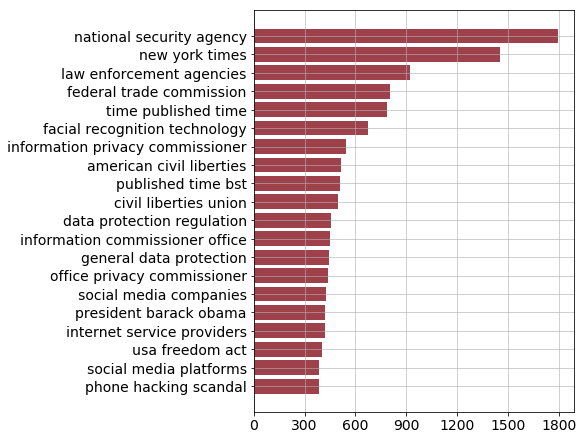

In [64]:
fig,ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

height = list(reversed(x))
bars = list(reversed(y))
y_pos = np.arange(len(bars))
 
plt.barh(y_pos, height, color="#87111d", alpha=0.8)
plt.yticks(y_pos, bars, size=14)
plt.xticks(range(0, 2001, 300), size=14)
 
plt.grid(alpha=0.75)
plt.show()


In [81]:
# df.to_csv('dataframe.zip')

# OLD

In [7]:
#categories = ["collection", "processing", "dissemination", "risk", "protection"]

article_ids = {}

with open('./final_annotations/agreed_annotations.csv', 'r') as f:
        reader = csv.reader(f)
        for r in reader:
            article_ids[r[0]] = r[1]

In [175]:
# ones_risk = [i for i in article_ids["risk"].keys() if int(article_ids["risk"][i]) == 1]
# ones_protection = [i for i in article_ids["protection"].keys() if int(article_ids["protection"][i]) == 1]

In [8]:
# TEST IF ONLY ABSTRACT
# db methods
def select_content(curs, db, aid):
    
    curs.execute("""SELECT title, content 
                FROM articles 
                WHERE article_id = '""" + aid + """' 
                """)
    
    text = ""
    result = curs.fetchall()

    return result[0][0] + " " + result[0][1]



In [9]:
data = {}

for a in article_ids.keys():
    data[a] = {
        "text": select_content(mycursor, mydb, a),
        "true_label": article_ids[a] 
    }
    
# for a in ones_protection:
#     if a in data.keys():
#         data[a]["true_label"] = "11" # both risk and protection
#     else:
#         data[a] = {
#             "text": select_content(mycursor, mydb, a),
#             "true_label": "01" # protection
#         }

In [13]:
len(data)

67

In [18]:
test_ids, remaining = get_set(round(0.1 * len(data.keys())), list(data.keys()))
validation_ids, remaining = get_set(round(0.1 * len(data.keys())), remaining)# get 1s
training_ids = remaining

test_data, validation_data, training_data = {}, {}, {}
## add content back
for i in test_ids:
    test_data[i] = data[i]
    
for i in validation_ids:
    validation_data[i] = data[i]

for i in training_ids:
    training_data[i] = data[i]

In [19]:
len(test_data)

7

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def get_conf_matrix(x, y):
    return confusion_matrix(np.array(x), y).ravel()

def get_recall(x, y):
    return recall_score(x, y, average='macro')
    
def get_precision(x, y):
    return precision_score(x, y, average='macro')

def get_f1_score(x, y):
    return f1_score(x, y, average='macro')

In [17]:
import random 

def get_set(cnt, ids):
    
    copy = ids
    
    random_ids = []
    
    for i in range(cnt):
        choice = random.choice(copy)
        random_ids.append(choice)
        copy.remove(choice)
        
    return sorted(random_ids), copy

In [154]:
categories = ["risk", "protection"]

# read keyterms

keyterms = {}

for c in categories:
    keyterms[c] = []
    with open("./keyterms/"+ c +".csv", "r") as f:
        reader = csv.reader(f)
        for r in reader:
            keyterms[c].append(r[0])
keyterms

{'protection': ['law enforcement',
  'data protection',
  'privacy law',
  'privacy laws',
  'electronic privacy',
  'legislation',
  'regulation',
  'control data',
  'data privacy',
  'privacy rights',
  'protect privacy',
  'privacy regulators',
  'legislation require',
  'privacy commissioner',
  'national privacy',
  'regulators',
  'privacy act',
  'protection',
  'data control',
  'right privacy',
  'right forgotten',
  'opt consent',
  'antitrust',
  'privacy protection',
  'data security',
  'information privacy',
  'privacy standards',
  'comply',
  'control',
  'privacy legislation'],
 'risk': ['facial recognition',
  'surveillance',
  'abuse',
  'exploitation',
  'revenge porn',
  'oversight',
  'profile',
  'cameras',
  'recognition',
  'cambridge analytica',
  'use facial',
  'big brother',
  'data breach',
  'breaches',
  'intelligence gathering',
  'tracking',
  'identity fraud',
  'privacy concerns',
  'privacy fears',
  'data retention',
  'concern',
  'concerns',
  '

In [20]:
def test_classifier(data): # data as dict of aid: text: "", true_label = {}
    
    ids = sorted(data.keys())

    predicted_labels = {}
    
    for aid in ids:
        models = model([data[aid]["text"]])
        predicted_labels[aid] = "".join([str(v) for v in classify(models).values()])

    x_data = [data[i]["true_label"] for i in ids]
    y_data = [predicted_labels[i] for i in ids]
    
    print("TRUE:\t\t", x_data)
    print("PREDICTED:\t", y_data)

    recall = round(get_recall(x_data, y_data), 3)
    precision = round(get_precision(x_data, y_data), 3)
    f1 = round(get_f1_score(x_data, y_data), 3)

    print("\nRecall:", recall)
    print("Precision:", precision)
    print("F1-score:", f1)

In [57]:
# always initialize


MAX_DF = 1 # discard words with frequency higher than 0.9 in the entire corpus
MIN_DF = 0 # include words that appear in at least x documents (??? unclear)
N_COMPONENTS = 2 # 3
MAX_ITER = 10
TOP_WORDS = 30

cv = CountVectorizer(max_df=MAX_DF, min_df=MIN_DF,
                    strip_accents="ascii",
                    stop_words="english",
                    analyzer="word",
                    )

lda = LDA(n_components=N_COMPONENTS, max_iter = MAX_ITER, n_jobs=-1) # n_jobs ?

W_COUNTS = []

def model(c): # content
    
    f = cv.fit_transform(c) # frequencies
    
    lda.fit(f) # extract topic
    
    words = cv.get_feature_names() # get names of words
  
    ms = {}
    
    for ind, topic in enumerate(lda.components_):
        top_50 = topic.argsort()[-TOP_WORDS:]
        
        ws = sorted(words[i] for i in top_50)
        ms[ind] = ws
        
    return ms # models

def cross_match(m): # cross-match one model
    
    w_counts = {}
    
    # with each category
    for c in categories:
        w_counts[c] = []
        for w in m: # for word in model
            for k in keyterms[c]: # for keyterm in category
                if k in w[:len(k)]: # words that begin with (using wild char)
                    w_counts[c].append({
                        "keyterm": k, 
                        "model_word": w
                    })
    W_COUNTS.append(w_counts)
    return w_counts

def classify(ms): # models
    
    cms = []
    
    for m in ms.keys(): # cross-match model
        cms.append((m, cross_match(ms[m])))

    v = {
        "risk": 0,
        "protection": 0
    }
    
    # validate risk
    
    # change to max
    
    vr = max(len(cms[0][1]["risk"]), len(cms[0][1]["protection"]))
    print("risk", len(cms[0][1]["risk"]))
    print("protection", len(cms[0][1]["protection"]))

    
    # if at least one model meets criteria
    for cm in cms: # for each cross-match b/w category keyterms and model words in one article
        #print(cm)
        if len(cm[1]["risk"]) >= 1:
            v["risk"] = 1
    
    # validate protection
    for cm in cms: # for each cross-match b/w category keyterms and model words in one article
        if len(cm[1]["protection"]) >= 2:
            v["protection"] = 1
    return v # verdict
    
    

In [58]:
test_classifier(validation_data)

risk 0
protection 1
risk 3
protection 1
risk 0
protection 2
risk 0
protection 0
risk 1
protection 1
risk 0
protection 0
risk 0
protection 1
TRUE:		 ['10', '01', '01', '10', '10', '10', '10']
PREDICTED:	 ['00', '01', '10', '00', '01', '00', '00']

Recall: 0.167
Precision: 0.167
F1-score: 0.167


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
W_COUNTS

[{'protection': [{'keyterm': 'regulat', 'model_word': 'regulators'}],
  'risk': []},
 {'protection': [{'keyterm': 'secur', 'model_word': 'security'}],
  'risk': [{'keyterm': 'attack', 'model_word': 'attack'},
   {'keyterm': 'breach', 'model_word': 'breached'},
   {'keyterm': 'breach', 'model_word': 'breaches'},
   {'keyterm': 'hack', 'model_word': 'hacked'}]},
 {'protection': [{'keyterm': 'regulat', 'model_word': 'regulation'},
   {'keyterm': 'saf', 'model_word': 'safety'}],
  'risk': []},
 {'protection': [], 'risk': []},
 {'protection': [{'keyterm': 'legislat', 'model_word': 'legislation'}],
  'risk': [{'keyterm': 'surveil', 'model_word': 'surveillance'}]},
 {'protection': [], 'risk': []},
 {'protection': [{'keyterm': 'regulat', 'model_word': 'regulation'}],
  'risk': [{'keyterm': 'surveil', 'model_word': 'surveillance'}]}]

In [65]:
processed_training = []

for i in training_ids:
    processed_training.append(process_article(data[i]["text"]))

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [79]:
processed_words = []

for i in processed_training:
    wrds = i.split()
    for w in wrds:
        if len(w) > 2:
            processed_words.append(porter_stemmer.stem(w))

In [80]:
processed_words = set(processed_words)

In [81]:
len(processed_words)

4314

In [85]:
def get_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    final_list = []
    for word in words_freq:
        #print(word)
        if(len(word[0])) > 2:
            final_list.append(word)
    #print(final_list)
    return final_list[:20] #words_freq

In [89]:
df = pd.DataFrame(processed_training, columns =["text"])

In [98]:
top_tri_grams = get_top_ngram(df['text'], n=2)
y, x = map(list,zip(*top_tri_grams)) # revert order of y, x

In [99]:
def get_article_ngram(content, n=None):
    
    vec = CountVectorizer(ngram_range=(n, n), stop_words="english").fit(content)
    
    bag_of_words = vec.transform(content)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    final_list = []
    for word in words_freq:
        #print(word)
        if(len(word[0])) > 2:
            final_list.append(word)
    #print(final_list)
    return words_freq# final_list[:20] #words_freq

In [120]:
risk_articles = [k for k in article_ids.keys() if article_ids[k] == '10']
protection_articles = [k for k in article_ids.keys() if article_ids[k] == '01']

In [211]:
df_all = pd.DataFrame.from_dict(data).T

In [124]:
risk_data, protection_data = [], [] 

for i in risk_articles:
    risk_data.append(process_article(data[i]["text"]))

for i in protection_articles:
    protection_data.append(process_article(data[i]["text"]))

In [125]:
rdf = pd.DataFrame(risk_data, columns =["text"])
pdf = pd.DataFrame(protection_data, columns =["text"])

In [132]:
ngram = get_article_ngram(pdf["text"], n=2)

In [363]:
# count frequency of occurrences of ngrams in each article
def ngram_frequency(content):
    
    # 1-grams
    ngram1 = get_article_ngram([content], n=1)
    
    words1 = []
    for ng in ngram1:
        if ng[1] > 1:
            words1.append((ng[0], ng[1]))

    # bi-grams
    ngram2 = get_article_ngram([content], n=2)
    
    words2 = []
    for ng in ngram2:
        if ng[1] > 1:
            words2.append((ng[0], ng[1]))
            
    # tri grams
    ngram3 = get_article_ngram([content], n=3)
    
    words3 = []
    for ng in ngram3:
        if ng[1] > 1:
            words3.append((ng[0], ng[1]))

    # match
    
    w_counts = {}
    
    # with each category
    for c in categories:
        w_counts[c] = []
        for w in ngram1: # for word in ngram map
            for k in keyterms[c]: # for keyterm in category
                if k == w[0]:
                    w_counts[c].append(w)
#                 if k in w[0][:len(k)]: # words that begin with (using wild char)
#                     w_counts[c].append({
#                         "keyterm": k, 
#                         "model_word": w
#                     })

    sums = {
        "risk": 0, #len(w_counts["risk"]),#0, 
        "protection": 0# len(w_counts["protection"])#0, 
    }
    
    for i in w_counts["risk"]:
        sums["risk"] += i[1]
    
    for i in w_counts["protection"]:
        sums["protection"] += i[1]
    
    
    verdict = max(sums.values())
    v_final = ""
    
    for k, v in sums.items():
        #print(v, verdict)
        #print(verdict)
        if v == verdict and verdict > 0:# and v <= (verdict + 1):
            #print(v)
            v_final += k
    
    #print(w_counts)
    #print(v_final)
    return v_final #w_counts

In [364]:
def convert_verdict(p):
    if p == "risk":
        return "10"
    if p == "protection":
        return "01"
    if p == "protectionrisk" or p == "riskprotection":
        return "11"
    if p == "":
        return "0"

In [365]:
correct, false_positive, false_negative = 0, 0, 0

results = {}

for a in data.keys():
    predicted = ngram_frequency(process_article(data[a]["text"]))
    true = data[a]["true_label"]
    
    predicted = convert_verdict(predicted)

    results[a] = {
        "p": predicted,
        "t": true
    }
    if predicted == true:
        correct += 1
    
print(len(data))
print(correct)

67
40


In [366]:
ids = results.keys()

x_data = [int(results[i]["t"]) for i in ids]
y_data = [int(results[i]["p"]) for i in ids]

print("TRUE:\t\t", x_data)
print("PREDICTED:\t", y_data)

recall = round(get_recall(x_data, y_data), 3)
precision = round(get_precision(x_data, y_data), 3)
f1 = round(get_f1_score(x_data, y_data), 3)

print("\nRecall:", recall)
print("Precision:", precision)
print("F1-score:", f1)

TRUE:		 [10, 10, 10, 1, 10, 10, 10, 1, 10, 1, 1, 11, 10, 10, 1, 10, 10, 1, 10, 10, 10, 1, 10, 10, 11, 10, 1, 10, 1, 1, 1, 1, 1, 10, 1, 10, 10, 10, 10, 10, 1, 1, 10, 10, 1, 10, 10, 1, 10, 10, 1, 1, 10, 1, 10, 11, 10, 10, 10, 10, 11, 10, 1, 10, 10, 1, 1]
PREDICTED:	 [1, 1, 10, 1, 10, 11, 10, 11, 10, 10, 1, 11, 10, 10, 0, 10, 11, 10, 0, 10, 1, 1, 10, 10, 1, 10, 10, 10, 10, 1, 10, 1, 1, 10, 10, 10, 10, 10, 10, 0, 0, 1, 0, 10, 1, 1, 0, 0, 10, 10, 1, 1, 10, 10, 10, 10, 10, 0, 10, 10, 10, 1, 1, 10, 10, 1, 10]

Recall: 0.361
Precision: 0.412
F1-score: 0.383


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [304]:
pd.set_option('display.max_rows', None)

In [ ]:


### +- 2 : 
Recall: 0.537
Precision: 0.605
F1-score: 0.433